In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dat_1 = pd.read_excel(r'../Data/AI_generated_Molecules_0_1_.xlsx')
dat_2 = pd.read_excel(r'../Data/AI_generated_Molecules_0_2_.xlsx')

In [3]:
dat_1.head()

,Unnamed: 0,AI_generated_SMILES
0,0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
1,1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
2,2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
3,3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
4,4,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...


In [4]:
dat_2.head()

,Unnamed: 0,AI_generated_SMILES
0,0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
1,1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
2,2,CSCC(=O)C=C1C(C2=C(OC)C(OC)=C(C=C2CC[C@@H1]1NC...
3,3,CNCCC=C1C(C2=C(OC)C(=C(C=C2CC[C@@H1]1NCN)C)OO)COC
4,4,COC1=CC2=C(C3=C(OC)C(OC)=CC=C3CC[C@@H1]2NOC)CC...


In [5]:
all_frames = [dat_1, dat_2]
all_dat = pd.concat(all_frames)

In [6]:
all_dat.shape

(2175, 2)

In [7]:
all_dat = all_dat.drop_duplicates(subset=['AI_generated_SMILES'])
all_dat.shape

(1786, 2)

In [8]:
all_dat.head()

,Unnamed: 0,AI_generated_SMILES
0,0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
1,1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
2,2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
3,3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
4,4,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...


In [9]:
## Similar structures
Colchicine_core = 'C1Cc2ccccc2C2=CC=CCC=C2C1'

In [10]:
def prepare_fingerprints(smi_1, smi_list2):
    mol_l1 = Chem.MolFromSmiles(smi_1)
    mol_l2 = [Chem.MolFromSmiles(smi) for smi in smi_list2]
    
    fingerprint_list1 = Chem.RDKFingerprint(mol_l1)
    
    fingerprint_list2 = [Chem.RDKFingerprint(mol) for mol in mol_l2]
    
    return fingerprint_list1, fingerprint_list2

In [11]:
def calculate_similarity(finger, finger_list):
    
    similarity = []
    for sim in finger_list:
        similarity.append(TanimotoSimilarity(sim, finger))
        
    return similarity

In [12]:
nea = prepare_fingerprints(Colchicine_core, all_dat['AI_generated_SMILES'])

In [13]:
simi = calculate_similarity(nea[0], nea[1])

In [14]:
final_df = pd.DataFrame(columns=['test'])
final_df['Similarity'] = 0
final_df['Similarity'] = simi
all_dat['Similarity to colchicine core'] = simi

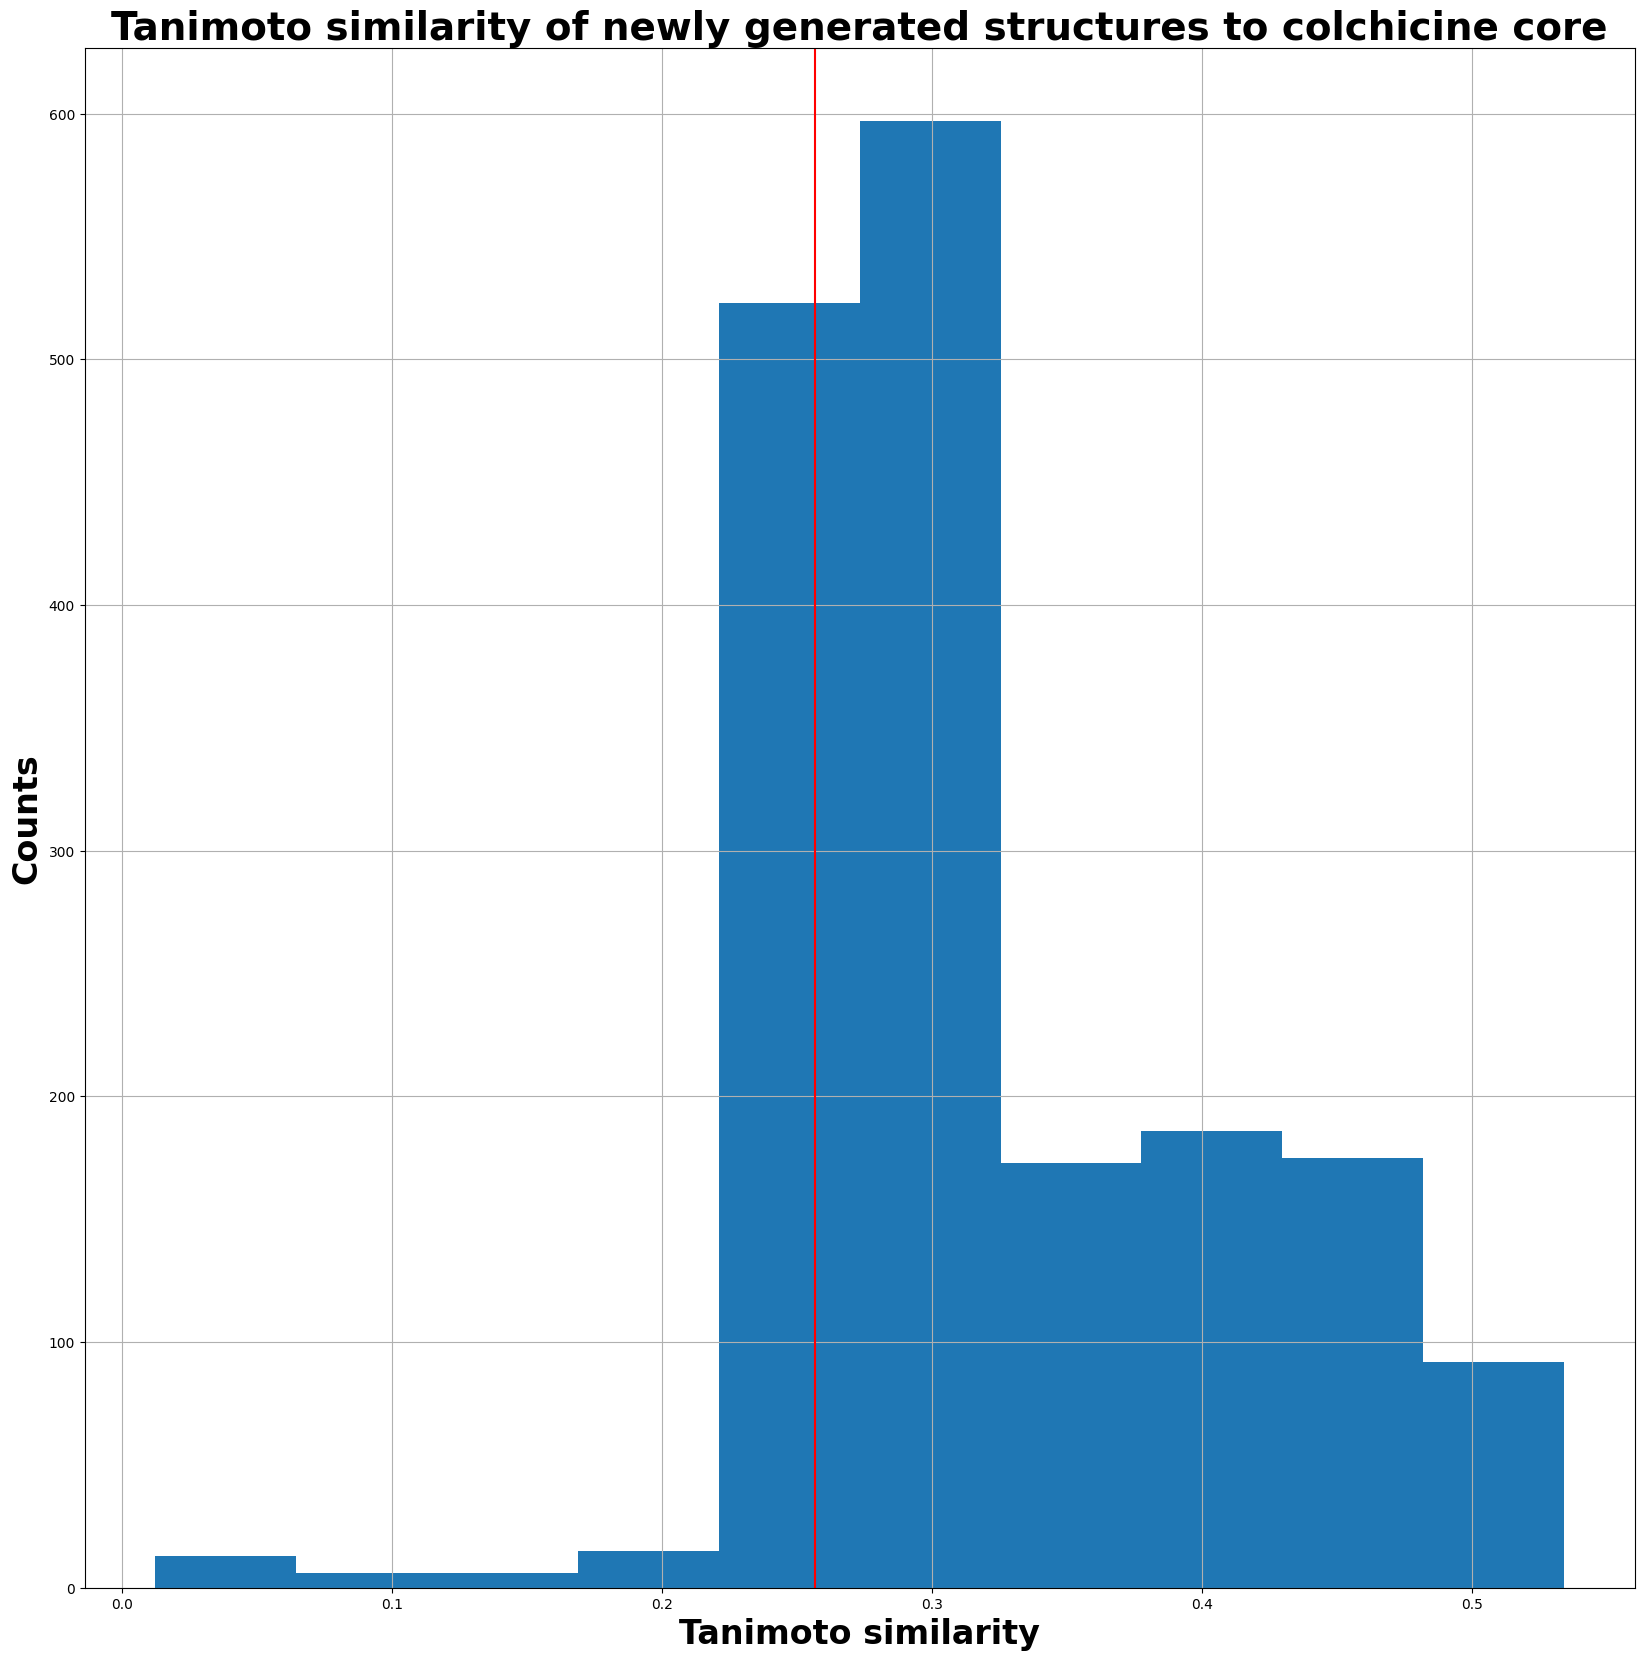

In [15]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(final_df['Similarity'], bins=10)
plt.title('Tanimoto similarity of newly generated structures to colchicine core', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.axvline(x = 0.2568064753495217, color = 'r', label = 'left-side cut off')
plt.grid(True)
plt.show()

In [16]:
final_df['Similarity'].min()

0.01228878648233487

In [17]:
Colchicine = 'CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC'

In [18]:
nea = prepare_fingerprints(Colchicine, all_dat['AI_generated_SMILES'])

In [19]:
simi = calculate_similarity(nea[0], nea[1])

In [20]:
final_df = pd.DataFrame(columns=['test'])
final_df['Similarity'] = 0
final_df['Similarity'] = simi
all_dat['Similarity to colchicine'] = simi

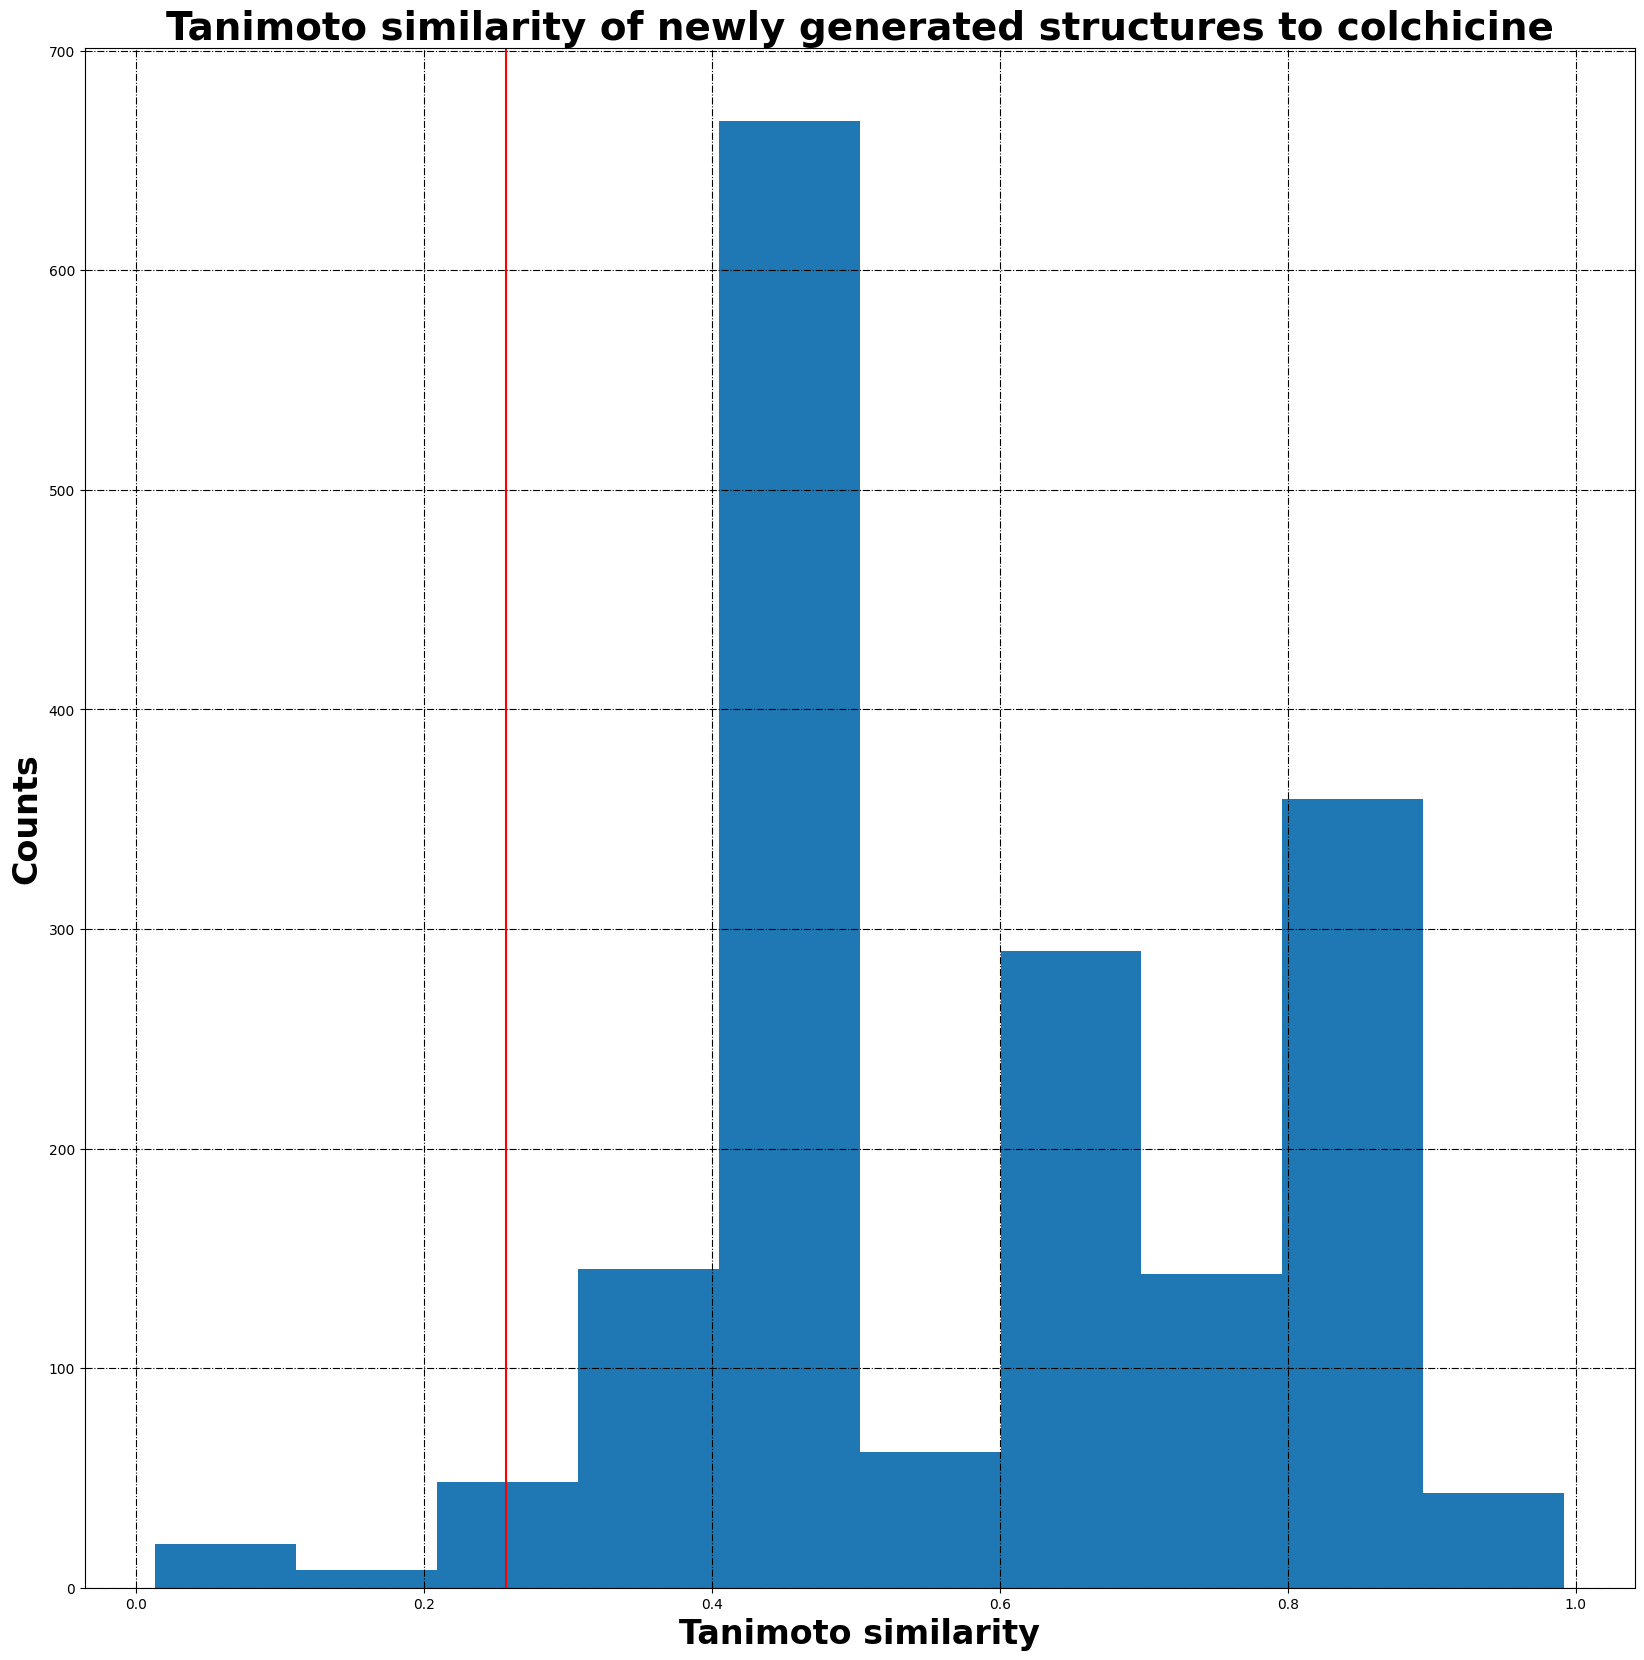

In [21]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(final_df['Similarity'], bins=10)
plt.title('Tanimoto similarity of newly generated structures to colchicine', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.axvline(x = 0.2568064753495217, color = 'r', label = 'left-side cut off')
plt.grid(True)
plt.show()

In [22]:
final_df['Similarity'].min()

0.013404825737265416

In [23]:
all_dat.head()

,Unnamed: 0,AI_generated_SMILES,Similarity to colchicine core,Similarity to colchicine
0,0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.266997,0.871074
1,1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.268667,0.844730
2,2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.268310,0.862520
3,3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.266807,0.862969
4,4,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.270042,0.860522


In [24]:
to_colchicyne_core = all_dat[all_dat['Similarity to colchicine core'] > 0.2568064753495217]
to_colchicyne_core.shape

(1678, 4)

In [25]:
to_colchicyne = all_dat[all_dat['Similarity to colchicine'] > 0.2568064753495217]
to_colchicyne.shape

(1740, 4)

In [ ]:
## Delete structures that are recreated => 100% similar (the same as initial)

In [26]:
initial_data = pd.read_excel(r'../Data/Kolchicyna_prepared_data.xlsx')

In [27]:
new_df = pd.DataFrame(data=to_colchicyne_core, columns=['AI_generated_SMILES'])
for element in initial_data['SMILES']:
    new_df[element] = 0

In [28]:
new_df = new_df.reset_index()
new_df = new_df.drop(columns=['index'])
new_df.head()

,AI_generated_SMILES,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
new_df.tail(n=5)

,AI_generated_SMILES,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12
1673,N([C@H1]1CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(NC)C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1674,O=C(CNC=C1C(C2=C(OC)C(OC)=C(OC)C=C2CC[C@@H1]1N...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,CNC(CNC(=O)OCCN[C@H1]1)CCC2=CC(OC)=C(OC)C(OC)=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,O=C(N[C@H1]1CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(N...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,C12=C3C(C4=C(OC)C(OC)=C(OC)C=C4CC[C@@H1]3NC(=O...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for element in initial_data['SMILES']:
    finger_1 = Chem.RDKFingerprint(Chem.MolFromSmiles(element))
    for i, smi in enumerate(new_df['AI_generated_SMILES']):
        finger_2 = Chem.RDKFingerprint(Chem.MolFromSmiles(smi))
        ta_sim = TanimotoSimilarity(finger_1, finger_2)
        new_df[element].loc[i] = ta_sim
        if ta_sim == 1:
            new_df[element][i] = 100

In [31]:
new_df.head()

,AI_generated_SMILES,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.854604,0.846400,0.843700,0.842482,0.841687,0.841144,0.841270,0.833989,0.840603,...,0.901929,0.891270,0.891892,0.893566,0.877743,0.877839,0.801847,0.862519,0.824652,0.926325
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.802326,0.794931,0.792496,0.791444,0.790680,0.790236,0.790396,0.783825,0.789794,...,0.917534,0.905213,0.908875,0.906003,0.901961,0.899061,0.823738,0.883346,0.848641,0.945500
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.846400,0.856000,0.853270,0.852029,0.851233,0.850675,0.850794,0.843430,0.850119,...,0.893312,0.882862,0.884949,0.885130,0.871018,0.872572,0.797602,0.856055,0.820102,0.917213
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.843949,0.837411,0.834776,0.833595,0.832810,0.832288,0.832420,0.825311,0.831768,...,0.893651,0.883229,0.886792,0.885490,0.869969,0.870070,0.800704,0.857903,0.816667,0.912795
4,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.844498,0.854067,0.857257,0.850119,0.855211,0.854647,0.854762,0.847364,0.854084,...,0.889770,0.879405,0.881476,0.887579,0.870543,0.870643,0.801128,0.858447,0.817126,0.913469


In [32]:
new_df.columns[3:][0]

'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC'

In [33]:
new_df.columns[1:][0]

'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC'

In [34]:
new_df.tail(n=5)

,AI_generated_SMILES,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12
1673,N([C@H1]1CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(NC)C...,0.441733,0.444647,0.445322,0.446873,0.445388,0.447209,0.446667,0.449819,0.447273,...,0.473652,0.475904,0.475875,0.476506,0.481949,0.484940,0.493976,0.481570,0.483159,0.468712
1674,O=C(CNC=C1C(C2=C(OC)C(OC)=C(OC)C=C2CC[C@@H1]1N...,0.468137,0.472783,0.474328,0.474070,0.475260,0.475290,0.477411,0.476914,0.478022,...,0.476647,0.481504,0.479714,0.482100,0.485714,0.484254,0.506857,0.492317,0.496241,0.469128
1675,CNC(CNC(=O)OCCN[C@H1]1)CCC2=CC(OC)=C(OC)C(OC)=...,0.729483,0.725490,0.727204,0.722431,0.725564,0.726521,0.726727,0.720774,0.726182,...,0.785388,0.779367,0.783825,0.782805,0.767857,0.765405,0.728709,0.773599,0.741002,0.802344
1676,O=C(N[C@H1]1CCC2=CC(OC)=C(OC)C(OC)=C2C3=CC=C(N...,0.836622,0.828772,0.826189,0.825039,0.824261,0.823758,0.823894,0.818322,0.823256,...,0.885917,0.875680,0.876265,0.879377,0.866923,0.865591,0.802105,0.853585,0.816739,0.907767
1677,C12=C3C(C4=C(OC)C(OC)=C(OC)C=C4CC[C@@H1]3NC(=O...,0.702219,0.697443,0.697872,0.697098,0.696391,0.697313,0.695131,0.692146,0.694640,...,0.704735,0.701173,0.701451,0.701863,0.708966,0.710345,0.682081,0.699661,0.691244,0.712154


In [35]:
for element in new_df.columns[1:]:
    
    new_df = new_df.drop(new_df[new_df[element] > 99].index)

In [36]:
new_df.shape

(1356, 119)

In [37]:
new_df.to_excel('../Data/Proposed_structures_with_AI_colchicyne_tanimoto_similarity_.xlsx')